<h1>注意</h1>
<h1>このチュートリアルは作成途中のものになります。</h1>

このノートブックではDigit Recognizeのチュートリアルを行っていきます。
なおここでは、digit_datasフォルダにデータがあると仮定して進めます。kaggleのkernelを使用している場合、データは../input/にあるので、データのパスをdigit_datasから../inputに変更してください
またこのノートブックではtensor flowがインストールされているという前提で話を進めます。お手元の環境で分析を行う場合はtensor flowをインストールしてください。

Digit Recognizerの目的は手書きの文字を認識、分類することです。このテーマで使用されているデータセットは非常に有名でMNISTというデータセットになります。<br>
ではどのように識別したらよいでしょうか<br>
ここではディープラーニングを使用して分類してみましょう。

ではまずディープラーニングについて話をしたいと思います。よく聞くワードですがディープラーニングとは果たして何なのでしょうか？<br>
ディープラーニングとは多層ニューラルネットワークのことです。しかし、こういわれてもニューラルネットワークとは？から始めないといけないと思います。<br>
ニューラルネットワークとは脳をコンピュータで再現しようというものです。ニューロンというものを組み合わせることでネットワークを作り、脳のようなものをコンピュータで再現しています。<br>
ニューラルネットワークは、まず脳の最小単位であるニューロンを再現しようというところから始まりました。その研究成果がパーセプトロンというモデルです。<br>
ニューロンはいくつかの入力と１つの出力を持っています。
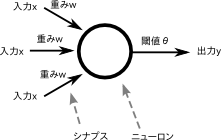
ニューロンは面白い仕組みを持っていて、各入力にある係数をかけた値の総和が一定以上になった時だけ出力を返すという仕組みを持っています。数学的に表すとn個の入力を$x_1,x_2,...,x_n$、重みを$w_1,w_2,...,w_n$、出力を返す時のある値を$a$とすると<br>
$$
\begin{equation*}
f( w_1 x_1 + w_2 x_2 + ...  + w_n x_n ) =    
    \left\{
        \begin{array}{l}
          1 (if w_1 x_1 + w_2 x_2 + ...  + w_n x_n \geq a) \\
          0 (if w_1 x_1 + w_2 x_2 + ...  + w_n x_n < a)
        \end{array}
    \right.
\end{equation*}
$$
となります。見やすいように総和記号を使用すると
$$
\begin{equation*}
    u = \sum_{i=1}^{n}w_i x_i
\end{equation*}
$$
と置くと
$$
\begin{equation*}
f(u) =    
    \left\{
        \begin{array}{l}
          1 (if u \geq a) \\
          0 (if u < a)
        \end{array}
    \right.
\end{equation*}
$$
となります。<br>
このパーセプトロンの重みの値を変化させていくことでパーセプトロンは学習していきます。ではどのように変化させていけばよいでしょうか？<br>
簡単に思いつく方法としては誤差を小さくしていく方向に重みを変化させるという方法です。では誤差を小さくしていく方向とはいったいどのような方向でしょうか？<br>
誤差が小さくなる方向とは誤差の変化率がマイナスになる方向のことというのは簡単にわかると思います。ここで、高校の数学を思い出してみてください、変化の割合率をどのように計算したでしょうか？<br>
ここで登場するのが微分です。微分は傾きを表しているというのを聞いたことがあると思います。<br>
微分とはある関数から傾きを求める操作のことを言います。微分された関数(導関数)の定義は、変数$x$の微小変化を$\Delta x$と置くと
$$
\begin{equation*}
    \frac{df(x)}{dx} = \lim_{\Delta x \to 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}
\end{equation*}
$$
となります。ここで$\lim_{\Delta x \to 0}$は$\Delta x$を0に近づけるということを表しています。<br>
変数が一つの関数であれば上の定義で問題ないでしょう、しかし問題にしているパーセプトロンは変数がいくつもあります。その場合どうしたらよいでしょうか?<br>
ここで、微分の定義に少し手を加えた偏微分というものをつかいます。偏微分は大雑把に言えば微分の対象としている変数以外を定数とみて微分することです。式で表すと<br>
$$
\begin{equation*}
    \frac{\partial f}{\partial x_{i}} = \lim_{\Delta x_i \to 0} \frac{f(x_1,x_2,...,x_i+\Delta x_i,..,x_n) - f(x_1,x_2,...,x_i,..,x_n)}{\Delta x_i}
\end{equation*}
$$
となります。
以上より重みの更新の式は、誤差の関数(誤差関数)$E$の傾きのマイナス方向に重みを更新していけばよいので、i番目の現在の重みを$w_{it}$、更新後の重みを$w_{it+1}$と置くと
$$
\begin{equation*}
    w_{it+1} = w_{it} - \frac{\partial E}{\partial w_{it}}
\end{equation*}
$$
となります。
しかし、これでは変化の割合が大きすぎることがあるので、ある正の値$\alpha$をかけて
$$
\begin{equation*}
    w_{it+1} = w_{it} - \alpha \frac{\partial E}{\partial w_{it}}
\end{equation*}
$$
としたものを更新の式にします。
パーセプトロンの誤差関数は次のようになります。
$$
\begin{equation*}
    E = max(0, -tu)
\end{equation*}
$$
これからパーセプトロンの重みの更新は
$$
\begin{eqnarray*}
    \frac{\partial E}{\partial w_{i}}& = &\frac{\partial (max(0, -tu))}{\partial w_{i}}\\
                                     & = &\frac{\partial (-t(w_1 x_1 + w_2 x_2 + ... + w_i x_i +  + w_n x_n))}{\partial w_i}\\
                                     & = &-tx_i
\end{eqnarray*}
$$
より
$$
\begin{eqnarray*}
    w_{it+1}& = &w_{it} - \alpha \frac{\partial E}{\partial w_{it}}\\
            & = &w_{it} + \alpha tx_i
\end{eqnarray*}
$$
となります。
これを用いることでパーセプトロンは学習していきます。

このパーセプトロンを使用すると線形分離可能な問題というものに対応できることがわかりました。線形分離可能な問題とは一本線を引いて分類可能なものを分類分けするといったものです。<br>
しかし、実際の問題は複雑な曲線で表されることが多く、そのような場合パーセプトロンは使い物になりません。ではどのようにしたらよいでしょうか。<br>
その答えになるのが多層パーセプトロンです。

多層パーセプトロンは簡単に言うと複数個パーセプトロンをつなげたものになります。